(veiled-resentment)=
# Veiled Resentment

 

```{raw} html
<style>
.float-right {
    float: right;
    width: 35%;
    height: auto;
    margin-left: 15px;
    border: 1px solid #ccc;
    padding: 5px;
    text-align: center;
    font-size: 12px;
    background-color: #f9f9f9;
}

.float-right p {
    text-align: left;
    font-size: 12px;
}
</style>

<div class="float-right">
    <img src="../../figures/guns-bible-anthro.jpeg" alt="Eco-Green QR Code" width="100%">
    <p>These were the gun, the bible, and the "anthropologist"</p>
</div>
```

 
```{raw} html
<style>
/* Wikipedia-style infobox */
.wiki-frame {
    float: right;
    width: 35%;
    margin-left: 15px;
    border: 1px solid #a2a9b1;
    padding: 10px;
    background-color: #f8f9fa;
    font-size: 14px;
    font-family: sans-serif;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
}

.wiki-frame h3 {
    background-color: #eaecf0;
    color: #000;
    text-align: center;
    padding: 5px;
    font-size: 16px;
    font-weight: bold;
    border-bottom: 2px solid #a2a9b1;
    margin-top: 0;
}

.wiki-frame pre {
    white-space: pre-wrap;
    background-color: #fff;
    padding: 8px;
    border: 1px solid #a2a9b1;
    font-family: monospace;
    overflow-x: auto;
}

/* Make the frame responsive */
@media (max-width: 768px) {
    .wiki-frame {
        float: none;
        width: 100%;
        margin-left: 0;
    }
}
</style>

<!-- Wikipedia-style Code Box -->
<div class="wiki-frame">


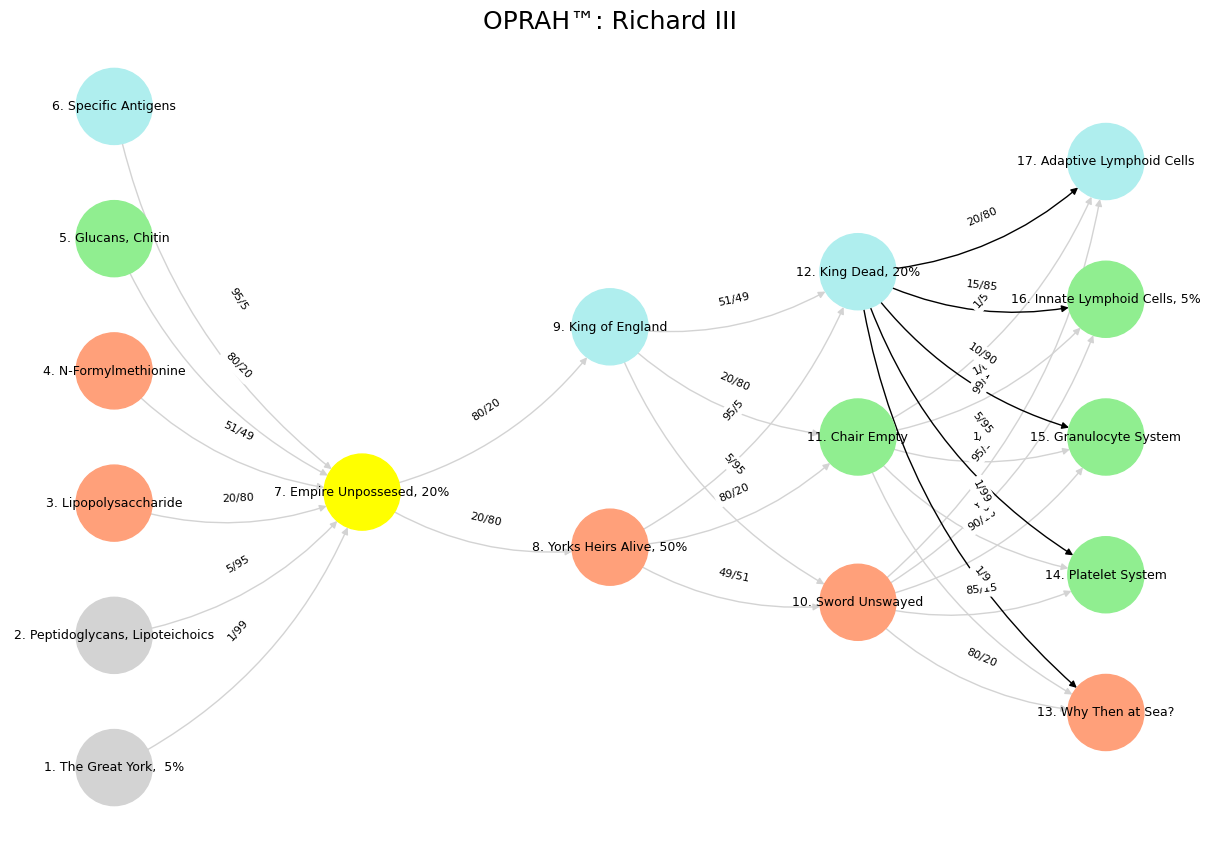

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network layers
def define_layers():
    return {
        'Suis': ['The Great York,  5%', 'Peptidoglycans, Lipoteichoics', 'Lipopolysaccharide', 'N-Formylmethionine', "Glucans, Chitin", 'Specific Antigens'],
        'Voir': ['Empire Unpossesed, 20%'],  
        'Choisis': ['Yorks Heirs Alive, 50%', 'King of England'],  
        'Deviens': ['Sword Unswayed', 'Chair Empty', 'King Dead, 20%'],  
        "M'èléve": ['Why Then at Sea?', 'Platelet System', 'Granulocyte System', 'Innate Lymphoid Cells, 5%', 'Adaptive Lymphoid Cells']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = {
        'yellow': ['Empire Unpossesed, 20%'],  
        'paleturquoise': ['Specific Antigens', 'King of England', 'King Dead, 20%', 'Adaptive Lymphoid Cells'],  
        'lightgreen': ["Glucans, Chitin", 'Chair Empty', 'Platelet System', 'Innate Lymphoid Cells, 5%', 'Granulocyte System'],  
        'lightsalmon': ['Lipopolysaccharide', 'N-Formylmethionine', 'Yorks Heirs Alive, 50%', 'Sword Unswayed', 'Why Then at Sea?'],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Define edge weights
def define_edges():
    return {
        ('The Great York,  5%', 'Empire Unpossesed, 20%'): '1/99',
        ('Peptidoglycans, Lipoteichoics', 'Empire Unpossesed, 20%'): '5/95',
        ('Lipopolysaccharide', 'Empire Unpossesed, 20%'): '20/80',
        ('N-Formylmethionine', 'Empire Unpossesed, 20%'): '51/49',
        ("Glucans, Chitin", 'Empire Unpossesed, 20%'): '80/20',
        ('Specific Antigens', 'Empire Unpossesed, 20%'): '95/5',
        ('Empire Unpossesed, 20%', 'Yorks Heirs Alive, 50%'): '20/80',
        ('Empire Unpossesed, 20%', 'King of England'): '80/20',
        ('Yorks Heirs Alive, 50%', 'Sword Unswayed'): '49/51',
        ('Yorks Heirs Alive, 50%', 'Chair Empty'): '80/20',
        ('Yorks Heirs Alive, 50%', 'King Dead, 20%'): '95/5',
        ('King of England', 'Sword Unswayed'): '5/95',
        ('King of England', 'Chair Empty'): '20/80',
        ('King of England', 'King Dead, 20%'): '51/49',
        ('Sword Unswayed', 'Why Then at Sea?'): '80/20',
        ('Sword Unswayed', 'Platelet System'): '85/15',
        ('Sword Unswayed', 'Granulocyte System'): '90/10',
        ('Sword Unswayed', 'Innate Lymphoid Cells, 5%'): '95/5',
        ('Sword Unswayed', 'Adaptive Lymphoid Cells'): '99/1',
        ('Chair Empty', 'Why Then at Sea?'): '1/9',
        ('Chair Empty', 'Platelet System'): '1/8',
        ('Chair Empty', 'Granulocyte System'): '1/7',
        ('Chair Empty', 'Innate Lymphoid Cells, 5%'): '1/6',
        ('Chair Empty', 'Adaptive Lymphoid Cells'): '1/5',
        ('King Dead, 20%', 'Why Then at Sea?'): '1/99',
        ('King Dead, 20%', 'Platelet System'): '5/95',
        ('King Dead, 20%', 'Granulocyte System'): '10/90',
        ('King Dead, 20%', 'Innate Lymphoid Cells, 5%'): '15/85',
        ('King Dead, 20%', 'Adaptive Lymphoid Cells'): '20/80'
    }

# Define edges to be highlighted in black
def define_black_edges():
    return {
        ('King Dead, 20%', 'Why Then at Sea?'): '1/99',
        ('King Dead, 20%', 'Platelet System'): '5/95',
        ('King Dead, 20%', 'Granulocyte System'): '10/90',
        ('King Dead, 20%', 'Innate Lymphoid Cells, 5%'): '15/85',
        ('King Dead, 20%', 'Adaptive Lymphoid Cells'): '20/80'
    }

# Calculate node positions
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    edges = define_edges()
    black_edges = define_black_edges()
    
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    
    # Create mapping from original node names to numbered labels
    mapping = {}
    counter = 1
    for layer in layers.values():
        for node in layer:
            mapping[node] = f"{counter}. {node}"
            counter += 1
            
    # Add nodes with new numbered labels and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            new_node = mapping[node]
            G.add_node(new_node, layer=layer_name)
            pos[new_node] = position
            node_colors.append(colors.get(node, 'lightgray'))
    
    # Add edges with updated node labels
    edge_colors = []
    for (source, target), weight in edges.items():
        if source in mapping and target in mapping:
            new_source = mapping[source]
            new_target = mapping[target]
            G.add_edge(new_source, new_target, weight=weight)
            edge_colors.append('black' if (source, target) in black_edges else 'lightgrey')
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    edges_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=3000, font_size=9, connectionstyle="arc3,rad=0.2"
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels, font_size=8)
    plt.title("OPRAH™: Richard III", fontsize=18)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
Is the chair empty? Is the sword unswayed? Is the King dead? The empire unpossessed? What heir of York is there alive but we? And who is England’s King but great York’s heir? Then tell me, what makes he upon the seas? 
```

</div>



#